# 1D Wave Equation with the Chebyshev Spectral Method

Consider the wave equation in one spatial dimension and time:
$$\frac{\partial^2 u}{\partial t^2} = \frac{\partial}{\partial x}\left( a(x) \frac{\partial u}{\partial x} \right), \qquad x\in[0, 1], \; t > 0.$$
Here $a(x) > 0$ models the effective squared wave speed which is assumed to vary in space but not in time. For example, the speed of sound in solids is typically directly related to the density of the material, hence this wave equation could be modeling sound waves propagating through a long solid rod which varies in density along its length.

The solution $u$ is subject to time dependant inhomogeneous Dirichlet boundary conditions at $x=0$,
$$u(0, t) = h(t),$$
and homogeneous Robin conditions at $x = 1$,
$$\frac{\partial u}{\partial t} + a\frac{\partial u}{\partial x}\bigg|_{x = 1} = 0.$$
The boundary condition at $x = 1$ is an approximate outflow condition, that is, the wave is assumed to flow freely out of the domain at this end point.

Finally, the solution $u$ and its velocity $u_t$ is known at $t = 0$, i.e. we have the initial conditions
$$u(x, 0) = f(x), \qquad u_t(x, 0) = g(x).$$

## Method of Lines

The solution depends on the spatial variable $x$ and the time variable $t$. To numerically approximate the solution to this partial differential equation we will treat these variables separately. First we will approximate the solution in space by an interpolating polynomial. This will turn spatial derivatives to matrix-vector multiplication and effectively turn the PDE into _a system of ordinary differential equations_, e.g.
$$\ddot{\mathbf{u}} = L \mathbf{u}$$
where $\mathbf{u}$ is the vector of solution values on a fixed grid, and $L$ is a matrix. Notably, $\mathbf{u}$ depents on time; the notation $\ddot{\mathbf{u}}$ is the second derivative in time of $\mathbf{u}$.
Rather than using a spectral method in time, it is more efficient (perhaps at the cost of accuracy) to advance the solution one small time step at a time (from $t$ to $t+\Delta t$ for small $\Delta t$).
This strategy of treating the variables of the differential equation separately is called _the method of lines_. It is a very natural approach for time dependant problem like the wave equation because changes in time are inherently progressive/dynamic whereas variation in space is inherently structured/geometric.

## Spatial Discretization

Let $x_k$ for $k=0,1,\dots,N$ be the Chebyshev Lobatto grid on $[0, 1]$. Let $u_k \approx u(x_k, t)$ and collect the solution values in the vector $\vec{u} = \begin{pmatrix} u_0 & u_1 & \cdots & u_N \end{pmatrix}$. Let $\mathcal{D}$ be the differentiation matrix associated with the grid $x_k$. Substituting $\vec{u}$ for $u$ and $\mathcal{D}$ for $\frac{\partial}{\partial x}$ in the wave equation we get:
$$\frac{d^2 \vec{u}}{dt^2} = \mathcal{D}\left( A \mathcal{D} \vec{u}\right).$$
Here $A$ is a diagonal matrix such that $A_{kk} = a(x_k)$.
We impose the Robin condition similarly to how we impose Neumann conditions. Define
$$\hat{\mathcal{D}} = \left( I - \mathbf{e}_N \mathbf{e}_N^T \right)\mathcal{D},$$
Then the boundary conditions imply that:
$$\mathcal{D} \vec{u} = \hat{\mathcal{D}}\vec{u} + \left(\frac{\partial u}{\partial x}\bigg|_{x=1}\right) \mathbf{e}_N = \hat{\mathcal{D}}\vec{u} + \left(-\frac{1}{a}\frac{\partial u}{\partial t}\bigg|_{x=1}\right)\mathbf{e}_N = \hat{\mathcal{D}}\vec{u} - \frac{1}{a(1)}\mathbf{e}_N \mathbf{e_N}^T \frac{d \vec{u}}{dt}.$$
We substitute this into the differential equation:
$$\frac{d^2\vec{u}}{dt^2} = \mathcal{D} A \left(\hat{\mathcal{D}} \vec{u} - \frac{1}{a(1)}\mathbf{e}_N \mathbf{e}_N^T \frac{d\vec{u}}{dt} \right) = \mathcal{D}A\hat{\mathcal{D}}\vec{u} - \mathcal{D}\mathbf{e}_N\mathbf{e}_N^T \frac{d\vec{u}}{dt} =: \mathcal{L}\vec{u} - \mathcal{H}\frac{d\vec{u}}{dt}.$$
Next, we eliminate the Dirichlet boundary condition. Let $P$ be the columns of the identity matrix exluding the first one, $\mathbf{e}_0$. Let $\mathbf{u}$ be all the values in $\vec{u}$ excluding $u_0$, i.e. $\mathbf{u} = P^T \vec{u}$. Then we can define the splitting:
$$\vec{u} = P \mathbf{u} + u_0\mathbf{e}_0.$$
Next, we plug this splitting into the differential equation and multiply by $P^T$:
$$\frac{d^2 \mathbf{u}}{dt^2} = P^T \mathcal{L} (P \mathbf{u} + u_0 \mathbf{e}_0) - P^T \mathcal{H} (P \frac{d\mathbf{u}}{dt} + \frac{d u_0}{dt} \mathbf{e}_0) = (P^T \mathcal{L} P) \mathbf{u} + u_0 (P^T \mathcal{L} \mathbf{e}_0) - (P^T \mathcal{H} P) \frac{d\mathbf{u}}{dt} - \frac{d u_0}{dt} (P^T\mathcal{H} \mathbf{e}_0)$$
Define $\mathbf{L} = P^T \mathcal{L} P$, $\mathbf{H} = P^T \mathcal{H} P$, and $\mathbf{q} = P^T \mathcal{L} \mathbf{e}_0$. Note that $P^T\mathcal{H} \mathbf{e}_0 = P^T \mathcal{D}\mathbf{e}_N\mathbf{e}_N^T \mathbf{e}_0 = 0$ (because $\mathbf{e}_N^T \mathbf{e}_0 = 0$) and from the Dirichlet condition we have $u_0 = h(t)$. All in all, the differential equation for the interior values $\mathbf{u}$ becomes
$$\ddot{\mathbf{u}} + \mathbf{H}\dot{\mathbf{u}} - \mathbf{L}\mathbf{u} = h(t) \mathbf{q}.$$
Where, again for emphasis,
$$\mathbf{L} = P^T \mathcal{D} A (I - \mathbf{e}_N\mathbf{e}_N^T)\mathcal{D} P,$$
$$\mathbf{H} = P^T \mathcal{D}\mathbf{e}_N\mathbf{e}_N^T P,$$
and
$$\mathbf{q} = P^T \mathcal{D} A (I - \mathbf{e}_N\mathbf{e}_N^T)\mathcal{D} \mathbf{e}_0. $$

#### Notes
Although in the code we will evaluate all of these expressions exactly as they appear here, it is worth noting that an efficient implementation will make note of the following:
* Multiplication on the left by $P^T$ selects all but the first row of a matrix/vector.
* Multiplication on the right by $P$ selects all but the first column of a matrix.
* Multiplication on the left by $I - \mathbf{e}_N\mathbf{e}_N^T$ is equivalent to setting all entries in the last row of a matrix to zero.
* $\mathbf{H}$ is a rank 1 matrix. Namely, $\mathbf{H} = (P^T \mathcal{D}\mathcal{e}_N)(P^T\mathcal{e}_N)^T$, thus the product $\mathbf{H u}$ is equivalent to scaling the last column of $\mathcal{D}$ by the last row of $\mathbf{u}$ and extracting all but the first element row of the result.
* Multiplication by $\mathcal{D}$ can be efficiently computed using the [fast cosine transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform).

## Time Integration

To solve the differential equation in time we approximate the second derivative with the finite difference estimate:
$$\ddot{f}(t + \Delta t) \approx \frac{f(t+\Delta t) - 2f(t) + f(t - \Delta t)}{\Delta t^2},$$
and similarly for the first derivative:
$$\dot{f}(t + \Delta t) \approx \frac{3 f(t+\Delta t) - 4f(t+\Delta t) + f(t-\Delta t)}{2\Delta t}.$$

We use these estimates to evaluate the differential equation at $t+\Delta t$ to get:
$$\frac{\mathbf{u}^{n+1} - 2\mathbf{u}^n + \mathbf{u}^{n-1}}{\Delta t^2} + \mathbf{H} \left(\frac{3 \mathbf{u}^{n+1} - 4\mathbf{u}^n + \mathbf{u}^{n-1}}{2\Delta t}\right) - \mathbf{L} \mathbf{u}^{n+1} = h^{n+1}\mathbf{q}.$$
Here we've used the notation $\mathbf{u}^{n} = \mathbf{u}(t)$ and $\mathbf{u}^{n+1} = \mathbf{u}(t + \Delta t)$, that is, $\mathbf{u}^n$ is value of $\mathbf{u}$ at the $n$-th time step. Rearanging yields:
$$\left(I + \frac{3}{2}\Delta t \mathbf{H} - \Delta t^2 \mathbf{L} \right)\mathbf{u}^{n+1} - 2(I + \Delta t \mathbf{H})\mathbf{u}^n + \left( I + \frac{1}{2}\Delta t \mathbf{H} \right)\mathbf{u}^{n-1} = \Delta t^2 h^{n+1}\mathbf{q}.$$
Define
$$B_0 = \left(I + \frac{3}{2}\Delta t \mathbf{H} - \Delta t^2 \mathbf{L}\right)^{-1}(I + \Delta t \mathbf{H}),$$
$$B_1 = \left(I + \frac{3}{2}\Delta t \mathbf{H} - \Delta t^2 \mathbf{L} \right)^{-1}\left( I + \frac{1}{2}\Delta t \mathbf{H} \right),$$
and
$$\mathbf{r} = \left(I + \frac{3}{2}\Delta t \mathbf{H} - \Delta t^2 \mathbf{L} \right)^{-1}\mathbf{q}.$$
Then
$$\mathbf{u}^{n+1} = 2 B_0 \mathbf{u}^{n} - B_1 \mathbf{u}^{n-1} + \Delta t^2 h^{n+1} \mathbf{r}.$$

Note that to compute the solution at the next time step $\mathbf{u}^{n+1}$, we need to know the solution at the current time $\mathbf{u}^{n}$ and one previous time step $\mathbf{u}^{n-1}$. Since for the first time step we do not have a previous step, we must take a different approach. Namely, since we know the derivative to $t=0$, we use the finite difference approximations:
$$\ddot{f}(t + \Delta t) \approx 2\frac{f(t+\Delta t) - f(t) - \Delta t \dot{f}(t)}{\Delta t^2}, \qquad \dot{f}(t + \Delta t) \approx \frac{2 f(t+\Delta t) - 2 f(t) - \Delta t f'(t)}{\Delta t}.$$
We substitute these approximations into the differential equation at $t = 0 + \Delta t$ to get:
$$2\frac{\mathbf{u}^{1} - \mathbf{u}^0 - \Delta t \dot{\mathbf{u}}^0}{\Delta t^2} + \mathbf{H} \left( \frac{2 \mathbf{u}^1 - 2 \mathbf{u}^0 - \Delta t \dot{\mathbf{u}}^0}{\Delta t} \right) - \mathbf{L}\mathbf{u}^{1} = h^1 \mathbf{q}.$$
Now we rearange for $\mathbf{u}^1$ and use the initial conditions $\mathbf{u}^0 = \mathbf{f}$ and $\dot{\mathbf{u}}^0 = \mathbf{g}$:
$$\left( I + \Delta t \mathbf{H} - \frac{1}{2}\Delta t^2 \mathbf{L} \right)\mathbf{u}^1 = (I + \Delta t\mathbf{H})\mathbf{f} + \Delta t \left( I + \frac{1}{2}\Delta t \mathbf{H}\right)\mathbf{g} + \frac{1}{2}\Delta t^2 h^1 \mathbf{q}.$$
Which we solve for $\mathbf{u}^1$.

#### Notes
In 1D, these matrices are fairly small so we explicitly construct $B_0$ and $B_1$. In general, it is far more efficient to solve the linear system at each time step. Moreover, because we can efficiently compute matrix-vector multiplication by $\mathbf{H}$ and $\mathbf{L}$, it proves to be much more practical to solve these linear systems iteratively using [preconditioned GMRES](https://en.wikipedia.org/wiki/Generalized_minimal_residual_method#:~:text=In%20mathematics%2C%20the%20generalized%20minimal,Krylov%20subspace%20with%20minimal%20residual.). If we implement this spectral method with the fast cosine transform and use a good preconditioner for the linear system, we would have a very efficient and scalable wave equation solver.

The time stepping strategy described here is an [implicit multistep method](https://en.wikipedia.org/wiki/Linear_multistep_method). This method is derived by constructing a quadratic polynomial which interpolates $u^{n-1}, u^n,$ and $u^{n+1}$ and requiring the differential equation to be satisfied at $t+\Delta t$. The time discretization errors are second order, that is the errors are on the order of $\Delta t^2$. This method is stable for any $\Delta t$. We could have constructed an explicit multistep method which would not require us to solve any linear systems, but such methods have a time step restriction. For the wave equation, we require $\Delta t \leq \frac{1}{N^2}$ using explicit methods, hence here we prefer an implicit method. Multistep methods are very efficient, however, they are famously limited by the Dahlquist barriers which state that implicit multistep methods of third order or higher are not [A-stable](https://en.wikipedia.org/wiki/Stiff_equation#A-stability). These barriers prove to be very restrictive for the wave equation. Nevertheless, higher order multistep methods can be constructed with only a moderate time step restriction. More generally, [Runge Kutta](https://en.wikipedia.org/wiki/Runge–Kutta_methods) methods can be used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import solve
from scipy.linalg import lu_factor, lu_solve
import scipy.sparse as sp

from cheb import *

## Example 
$$a(x) = \frac{11}{10} - (4x)^5 (1 - x)^5, \qquad h(t) = \cos(5\pi t),$$
$$f(x) = e^{-x}, \qquad g(x) = 0.$$


In [2]:
# setup
a = lambda x: 1.1 - (4*x)**5 * (1 - x)**5
h = lambda t: np.cos(5 * np.pi * t)
f = lambda x: np.exp(-x)
g = lambda x: np.zeros_like(x)

T = 2

In [3]:
nt = T * 60 # 60 frames per second
dt = T / nt

Nx = 64
x = chebyshev_lobatto_grid(0, 1, Nx)
D = diff_matrix(x)

I = np.eye(Nx)
e0 = I[:, 0]
eN = I[:, -1]
P = I[:, 1:]

A = np.diag(a(x))
L = D @ A @ (I - np.outer(eN, eN)) @ D

q = P.T @ (L @ e0)
L = P.T @ L @ P

H = P.T @ D @ np.outer(eN, eN) @ P

I = np.eye(Nx-1)
lu = lu_factor(I + (1.5 * dt) * H - dt**2 * L)
B0 = lu_solve(lu, I + dt * H)
B1 = lu_solve(lu, I + 0.5 * dt * H)
r = lu_solve(lu, q)

In [4]:
# um <- u[n-1],  u <- u[n],   up <- u[n+1]

# for visualization we will store all of the solutions in U
U = list()

# zero time step
t = 0
um = P.T @ f(x)

U.append(P @ um + h(0) * e0)

# first time step
t += dt
b = (I + dt * H) @ um + dt * (I + 0.5 * dt * H) @ P.T @ g(x) + (0.5 * dt**2 * h(t)) * q
u = solve(I + dt * H - 0.5 * dt**2 * L, b)

U.append(P @ u + h(t) * e0)

# all time steps
for n in range(2, nt+1):
  t += dt
  up = 2 * B0 @ u - B1 @ um + (dt**2 * h(t)) * r

  U.append(P @ up + h(t) * e0)

  # for the next time step, um = u and u = up
  um = u
  u = up

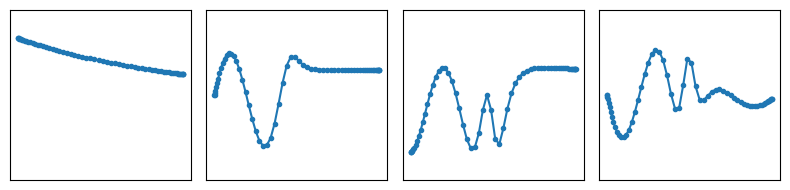

In [5]:
# This cell plots the solution for four evenly spaced times in the interval [0, T]

fig, ax = plt.subplots(1,4, figsize=(8,2))
for i in range(4):
  ax[i].plot(x, U[i * len(U) // 4], '.-')
  ax[i].set_ylim([-1.5,1.5])
  ax[i].set_xticks([])
  ax[i].set_yticks([])
fig.tight_layout()

In [6]:
%%capture
# ^ this line tells the Jupyter notebook not to show output for this cell

## This cell generates an animation of the wave equation. It may take a long time to compute.

import matplotlib.animation as animation

z = np.linspace(0, 1, 200)
P = interpolation_matrix(x, z)

fig, ax = plt.subplots(1,1, figsize=(4,4))
lines = ax.plot(z, P @ U[0], '-', animated=True)
ax.set_ylim([-1.5,1.5])

nframes = len(U)

def update_fig(it):
    print(f"{it:>5} / {nframes}", end='\r')
    for (j, line) in enumerate(lines):
        line.set_ydata(P @ U[it])
    return lines

FFwriter = animation.FFMpegWriter(fps=60)
ani = animation.FuncAnimation(fig, update_fig, frames=nframes, blit=True)
ani.save("wave1d.mov", writer=FFwriter);

<video width="320" height="320" controls>
  <source src="wave1d.mov" type="video/mp4">
</video>

# 2D Wave Equation with Spectral Methods

Consider the wave equation in two spatial dimensions and time,
$$ \frac{\partial^2 u}{\partial t^2} = \nabla \cdot (a(x,y) \nabla u), \qquad (x,y)\in[0,1]^2, \; t > 0.$$

Subject to a Dirichlet boundary condtion at $x = 0$,
$$u(0, y, t) = h(y, t),$$
A robin condition at $x = 1$,
$$\frac{\partial u}{\partial t} + a(x, y) \frac{\partial u}{\partial x} \bigg|_{x=1}= 0,$$
and Neumann boundary conditions at $y = 0$ and $y = 1$,
$$u_y(x, 0, t) = 0, \quad u_y(x, 1, t) = 0.$$
We also have the initial conditions:
$$u(x, y, 0) = f(x, y), \quad u_t(x, y, 0) = g(x, y).$$

## Spatial Discretization
Let $x_k$ and $y_{\ell}$ be Chebyshev Lobatto grids on $[0,1]$ (they may be of different lengths). We choose the interpolation points to be all pairs $(x_k, y_{\ell})$ for $k=0,\dots, K$ and $\ell=0,\dots, L$. Let $U\in\R^{K\times L}$ be the grid of interpolation values, i.e. $U_{k,\ell} \approx u(x_k, y_{\ell})$ (note that $U$ is a matrix). It will prove useful to work with vectors rather than grids, so let $\vec{u}\in\R^{KL}$ be the vectorization of $U$ meaning
$$u_{k + K\ell} = U_{k,\ell}.$$
Let $\mathcal{D}_x$ be the differentiation matrix on associated with grid $x_k$ and let $\mathcal{D}_y$ be the differentiation matrix associated with grid $y_k$. Without proof, we claim that
$$\frac{\partial u}{\partial x} = \mathcal{D}_x U.$$
and
$$\frac{\partial u}{\partial y} = U D_y^T.$$
That is, the derivative with respect to $x$ is computed by left multiplication of $U$ by $\mathcal{D}_x$ and the derivative with respect to $y$ is computed by right multiplcation of $U$ by the transpose of $\mathcal{D}_y$. Further, let $D_x = I_L \otimes \mathcal{D}_x$ where $I_L$ is the $L\times L$ identity matrix and $\otimes$ denotes the [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product), and let $D_y = \mathcal{D}_y \otimes I_K$, then
$$\frac{\partial u}{\partial x} = D_x \vec{u},$$
and
$$\frac{\partial u}{\partial x} = D_y \vec{u}.$$
Substitute $\vec{u}$ for $u$, $D_x$ for $\frac{\partial}{\partial x}$, and $D_y$ for $\frac{\partial}{\partial y}$ into the wave equation
$$\frac{d^2\vec{u}}{dt^2} = \left(D_x A D_x + D_y A D_y \right) \vec{u}$$
Here, $A$ is a diagonal matrix whose elements  are the vectorization of $a_{k,\ell} = a(x_k, y_{\ell})$. 

### Boundary Conditions
First, we incorporate the Neumann boundary conditions. Define
$$\hat{\mathcal{D}}_y = (I - \mathbf{e}_0\mathbf{e}_0^T - \mathbf{e}_L\mathbf{e}_L^T)\mathcal{D}_y,$$
and define the corresponding matrix $\hat{D}_y$ using the Kronecker product.
We substitute this modified differentiation matrix into the differential equation we get:
$$\frac{d^2\vec{u}}{dt^2} = \left(D_x A D_x + D_y A \hat{D}_y \right) \vec{u}.$$

Next, we incorporate the Robin boundary conditions. Define
$$\hat{\mathcal{D}}_x = (I - \mathbf{e}_K\mathbf{e}_K^T)\mathcal{D}_x.$$
Define the diagonal $L\times L$ matrix $A_y$ such that $(A_y)_{\ell,\ell} = a(1,y_\ell)$, then
$$\mathcal{D}_x U = \hat{\mathcal{D}}_x U - \mathbf{e}_K \mathbf{e}_K^T \dot{U} A_y^{-1}$$
Define,
$$\hat{D}_x = I_L \otimes \hat{\mathcal{D}}_x, \qquad E = A_y^{-1} \otimes \mathbf{e}_K\mathbf{e}_K^T$$
Plugging this into the differential equation we get:
$$\frac{d^2\vec{u}}{dt^2} = (D_x A \hat{D}_x + D_y A \hat{D}_y)\vec{u} - D_x A E \frac{d\vec{u}}{dt}.$$

Finally, we deal with the Dirichlet boundary condition. Let $P$ be the matrix whose columns are those of the $K\times K$ identity matrix excluding the first column, $\mathbf{e}_0$. Let $\mathbf{u}$ be the solution values not including the Dirichlet values $\mathbf{h}(t) = \begin{pmatrix} h(y_0, t) & h(y_1, t) & \cdots & h(y_N, t) \end{pmatrix}^T$. This gives us the partition,
$$\vec{u} = (I_L \otimes P)\mathbf{u} + (I_L \otimes \mathbf{e}_0)\vec{h}(t).$$
We substitute this partition into the differential equation and multiply by $(I_L \otimes P)^T$ to get a differential equation for $\mathbf{u}$:
$$\ddot{\mathbf{u}} = (I_L \otimes P)^T (D_x A \hat{D}_x + D_y A \hat{D}_y)\left[ (I_L \otimes P)\mathbf{u} + (I_L \otimes \mathbf{e}_0)\mathbf{h}(t) \right] - (I_L \otimes P)^T D_x A E \left[ (I_L \otimes P)\dot{\mathbf{u}} + (I_L \otimes \mathbf{e}_0)\dot{\mathbf{h}} \right].$$
Without proof, it can be verified that $(I_L \otimes P)^T D_x A E (I_L \otimes \mathbf{e}_0) = 0$. Thus,
$$\ddot{\mathbf{u}} + \mathbf{H} \dot{\mathbf{u}} - \mathbf{L u} = \mathbf{Q} \mathbf{h}(t),$$
where (using properties of the Kronecker product),
$$\begin{align*}
\mathbf{H} &= (I_L \otimes P)^T D_x A E (I_L \otimes P) \\
&= \left[I_L \otimes (P^T \mathcal{D}_x)\right] A \left[A_y^{-1} \otimes (\mathbf{e}_K\mathbf{e}_K^T P)\right],
\end{align*}$$
$$\begin{align*}
\mathbf{L} &= (I_L \otimes P)^T (D_x A \hat{D}_x + D_y A \hat{D}_y) (I_L \otimes P) \\
&= [I_L \otimes (P^T \mathcal{D}_x)] A [I_L \otimes (\hat{\mathcal{D}}_x P)] + (\mathcal{D}_y \otimes P^T) A (\hat{\mathcal{D}}_y \otimes P),
\end{align*}$$
and
$$\begin{align*}
\mathbf{Q} &= (I_L \otimes P)^T (D_x A \hat{D}_x + D_y A \hat{D}_y) (I_L \otimes \mathbf{e}_0) \\
&= [I_L \otimes (P^T \mathcal{D}_x)] A [I_L \otimes (\hat{\mathcal{D}}_x \mathbf{e}_0)] + (\mathcal{D}_y \otimes P^T) A (\hat{\mathcal{D}}_y \otimes \mathbf{e}_0).
\end{align*}$$
Note that this differential equation looks _very_ similar to the 1D case...

#### Notes
The Kronecker product is used mostly for formality here so we can work with vectors. In a practical implementation we can work directly with the arrays and apply the operators by left and right matrix multiplications. Again, we can implement this efficiently with the two dimensional fast cosine transform.

## Time Integration

Since we are solving essentially the same system in time as we did in 1D, we use the same time stepping scheme, which we restate here.

Initialize

$$\mathbf{u}^0 = \mathbf{f}.$$

First time step, solve for $\mathbf{u}^1$:
$$\left( I + \Delta t \mathbf{H} - \frac{1}{2}\Delta t^2 \mathbf{L} \right)\mathbf{u}^1 = (I + \Delta t\mathbf{H})\mathbf{f} + \Delta t \left( I + \frac{1}{2}\Delta t \mathbf{H}\right)\mathbf{g} + \frac{1}{2}\Delta t^2 \mathbf{Q}\mathbf{h}^1.$$

For $n = 1, 2, \dots$ solve for $\mathbf{u}^{n+1}$:


$$\left(I + \frac{3}{2}\Delta t \mathbf{H} - \Delta t^2 \mathbf{L} \right)\mathbf{u}^{n+1} = 2(I + \Delta t \mathbf{H})\mathbf{u}^n - \left( I + \frac{1}{2}\Delta t \mathbf{H} \right)\mathbf{u}^{n-1} + \Delta t^2 \mathbf{Q}\mathbf{h}^{n+1}.$$

## Example

$$a(x, y) = \frac{11}{10} - e^{-(\frac{10 y - \frac{5}{2}x^2 - 5}{x + 1})^2}, \qquad h(y, t) = e^{-(8y-4)^2} \sin 15t,$$
$$f(x, y) = 0, \qquad g(x, y) = 0.$$

In [7]:
# problem setup
a = lambda x, y: 1.1 - np.exp(-((10*y - 2.5*x**2 - 5) / (x + 1))**2)
f = lambda x, y: np.zeros_like(x)
g = lambda x, y: np.zeros_like(x)
h = lambda y, t: np.exp(-64*(y-0.5)**2) * np.sin(15*t)

T = 4

In [8]:
nt = T * 120 # 120 frames per second
dt = T / nt

# setup grid and compute 1D differentation matrices.
Nx = 50
x = chebyshev_lobatto_grid(0, 1, Nx)
Dx = diff_matrix(x)

Ny = 64
y = chebyshev_lobatto_grid(0, 1, Ny)
Dy = diff_matrix(y)

# 2D grid
X, Y = np.meshgrid(x, y)
X = X.reshape(-1)
Y = Y.reshape(-1)

# variable coefficient
A = sp.diags( a(X, Y) )
Ay = sp.diags( 1 / a(1, y) )

# compute Neumann correct D
Ix = np.eye(Nx)
Dx_tilde = (Ix - np.outer(Ix[:, -1], Ix[:, -1])) @ Dx

Iy = np.eye(Ny)
Dy_tilde = (Iy - np.outer(Iy[:, 0], Iy[:, 0]) - np.outer(Iy[:, -1], Iy[:, -1])) @ Dy

# compute P
P = sp.csr_matrix(Ix[:, 1:])
Pr = sp.kron(sp.identity(Ny), P)
Pc = sp.kron(sp.identity(Ny), Ix[:,0].reshape(-1,1))

# setup L, H, Q
e0 = Ix[:, 0].reshape(-1, 1) # make sure e0 is a column vector to work correctly with kron
eK = Ix[:, -1]
Ix = sp.identity(Nx) # we switch to sparse matrices here to ensure kron is computed quickly
Iy = sp.identity(Ny)
H = sp.kron(Iy, P.T @ Dx) @ A @ sp.kron(Ay, np.outer(eK, P.T @ eK))
L = sp.kron(Iy, P.T @ Dx) @ A @ sp.kron(Iy, Dx_tilde @ P) + sp.kron(Dy, P.T) @ A @ sp.kron(Dy_tilde, P)
Q = sp.kron(Iy, P.T @ Dx) @ A @ sp.kron(Iy, Dx_tilde @ e0) + sp.kron(Dy, P.T) @ A @ sp.kron(Dy_tilde, e0)

H = H.toarray() # this is to get around using sparse matrices
L = L.toarray()
Q = Q.toarray()

ndof = L.shape[0]
I = np.eye(ndof)
lu = lu_factor(I + (1.5 * dt) * H - dt**2 * L)
B0 = I + dt * H
B1 = I + 0.5 * dt * H

In [9]:
# store all time steps in U
U = list()

# zero time step
t = 0
um =  Pr.T  @ f(X, Y)

U.append( Pr @ um + Pc @ h(y, t) )

# first time step
t += dt

b = B0 @ um
b += dt * ( B1 @ (Pr.T @ g(X, Y)) )
b += (0.5 * dt**2) * (Q @ h(y, t))

u = solve(I + dt * H - (0.5 * dt**2) * L, b)

U.append( Pr @ u + Pc @ h(y, t) )

# all time steps
for n in range(1, nt):
  t += dt
  print(f"t = {t:<03.2f}", end='\r', flush=True)

  b = 2 * (B0 @ u) - B1 @ um + dt**2 * (Q @ h(y, t))
  up = lu_solve(lu, b)

  U.append( Pr @ up + Pc @ h(y, t) )

  um = u
  u = up

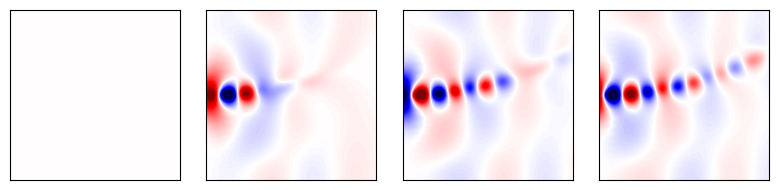

In [10]:
fig, ax = plt.subplots(1,4, figsize=(8,2))
skip = len(U)//4

zx = np.linspace(0, 1, 500)
zy = np.linspace(0, 1, 500)
Px = interpolation_matrix(x, zx)
Py = interpolation_matrix(y, zy)

for i in range(4):
  V = Py @ U[skip * i].reshape((Ny, Nx)) @ Px.T
  ax[i].imshow(V, vmin=-1, vmax=1, extent=[0, 1, 0, 1], origin='lower', cmap='seismic')
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  ax[i].set_aspect('equal','box')
fig.tight_layout()

In [11]:
%%capture

# This cell generates a video which may take a long time!

fig, ax = plt.subplots(1, 1, figsize=(4,4))
im = ax.imshow(Py @ U[0].reshape((Ny, Nx)) @ Px.T, extent=[0, 1, 0, 1], vmin=-1, vmax=1, origin='lower', cmap='seismic')
ax.set_aspect('equal','box')

nframes = len(U)//2

def update_fig(it):
  print(f"{it:>5} / {nframes}", end='\r')
  V = Py @ U[2*it].reshape((Ny, Nx)) @ Px.T
  im.set_data(V)
  return im,

FFwriter = animation.FFMpegWriter(fps=60)
ani = animation.FuncAnimation(fig, update_fig, frames=nframes, blit=True)
ani.save("wave2d.mov", writer=FFwriter, dpi=200)

<video width="320" height="320" controls>
  <source src="wave2d.mov" type="video/mp4">
</video>